In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('C://Users//DanukaDilshanRathnay//Desktop//AI-Driven-Job-Role-Fit-Prediction//Merge_data_new.xlsx')

In [3]:
df.columns

Index(['EmployeeCode', 'Technical Score_JD', 'Programming Score_JD',
       'Soft Score_with_JD', 'Education_match_Score_with_JD', 'Gender', 'Age',
       'Department', 'JobCategory', 'Designation', 'JobLevel',
       'ProficiencyLevel', 'Education Qualifications',
       'Professional Qualifications With Years', 'Date of Joining',
       'Years of Experience in Company', 'Handled Projects',
       'Disciplinary Actions (Yes/No)', 'Type of Disciplinary Action',
       'Promoted Before', 'Employee Rejoined', 'Current Role', 'KPI',
       'Absentism Rate', 'Employee Satisfaction Score',
       'Experience in Years Previous Positions', 'Total Experience in Years',
       'Number of Goal Assigned', 'Number of Goals Achieved',
       'Employee Score Based on Goals'],
      dtype='object')

In [4]:
un_col=['Gender','Department', 'JobCategory', 'Designation', 'JobLevel',
       'ProficiencyLevel', 'Education Qualifications',
       'Professional Qualifications With Years', 'Date of Joining', 'Handled Projects',
       'Disciplinary Actions (Yes/No)', 'Type of Disciplinary Action',
       'Promoted Before', 'Employee Rejoined', 'Current Role','Experience in Years Previous Positions']
df_n=df.drop(columns=un_col)

In [5]:
df_n.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Age,Years of Experience in Company,KPI,Absentism Rate,Employee Satisfaction Score,Total Experience in Years,Number of Goal Assigned,Number of Goals Achieved,Employee Score Based on Goals
0,EMP1001,0.292466,0.231446,0.329284,0.344153,26,3.8,75.6,2.4,10.8,4.0,18,0,34.7
1,EMP1005,0.097209,0.106986,0.311831,0.555293,42,3.3,66.8,3.3,6.3,17.7,19,17,108.9
2,EMP1012,0.072601,-0.008218,0.478025,0.526082,46,7.5,73.3,2.7,8.9,18.2,8,6,106.6
3,EMP1026,0.120334,0.140910,0.311831,0.471978,38,3.1,72.1,2.8,7.9,3.2,8,4,51.2
4,EMP1028,0.033789,0.058121,0.400937,0.378987,44,5.6,82.0,1.8,8.2,7.9,8,5,73.3


In [6]:
df_n["Goal Complete Ratio"] = df_n['Number of Goals Achieved'] / df_n['Number of Goal Assigned']

df_n.drop(columns=['Number of Goal Assigned', 'Number of Goals Achieved'], inplace=True)


In [7]:
df_n.head()

,EmployeeCode,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Age,Years of Experience in Company,KPI,Absentism Rate,Employee Satisfaction Score,Total Experience in Years,Employee Score Based on Goals,Goal Complete Ratio
0,EMP1001,0.292466,0.231446,0.329284,0.344153,26,3.8,75.6,2.4,10.8,4.0,34.7,0.000000
1,EMP1005,0.097209,0.106986,0.311831,0.555293,42,3.3,66.8,3.3,6.3,17.7,108.9,0.894737
2,EMP1012,0.072601,-0.008218,0.478025,0.526082,46,7.5,73.3,2.7,8.9,18.2,106.6,0.750000
3,EMP1026,0.120334,0.140910,0.311831,0.471978,38,3.1,72.1,2.8,7.9,3.2,51.2,0.500000
4,EMP1028,0.033789,0.058121,0.400937,0.378987,44,5.6,82.0,1.8,8.2,7.9,73.3,0.625000


### Apply PCA

In [8]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   EmployeeCode                    542 non-null    object 
 1   Technical Score_JD              542 non-null    float64
 2   Programming Score_JD            542 non-null    float64
 3   Soft Score_with_JD              542 non-null    float64
 4   Education_match_Score_with_JD   542 non-null    float64
 5   Age                             542 non-null    int64  
 6   Years of Experience in Company  542 non-null    float64
 7   KPI                             542 non-null    float64
 8   Absentism Rate                  542 non-null    float64
 9   Employee Satisfaction Score     542 non-null    float64
 10  Total Experience in Years       542 non-null    float64
 11  Employee Score Based on Goals   542 non-null    float64
 12  Goal Complete Ratio             542 

In [9]:
employee_ids = df_n['EmployeeCode']
df_di=df_n.drop(columns=["EmployeeCode"])


In [10]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sd=StandardScaler()
mn=MinMaxScaler()

In [11]:
df_con=sd.fit_transform(df_di)
df_con=pd.DataFrame(df_con,columns=df_di.columns)
df_con.head()

,Technical Score_JD,Programming Score_JD,Soft Score_with_JD,Education_match_Score_with_JD,Age,Years of Experience in Company,KPI,Absentism Rate,Employee Satisfaction Score,Total Experience in Years,Employee Score Based on Goals,Goal Complete Ratio
0,0.953732,0.165882,-0.423674,-1.294737,-1.413294,-0.436307,0.036036,-0.075868,2.255697,-1.114701,-1.733889,-1.673640
1,-0.617442,-0.489970,-0.609118,0.125122,0.007372,-0.612023,-0.835542,0.815900,-0.807580,0.739156,1.078562,1.156797
2,-0.815451,-1.097048,1.156722,-0.071316,0.362538,0.863990,-0.191763,0.221388,0.962314,0.806815,0.991383,0.698933
3,-0.431363,-0.311206,-0.609118,-0.435152,-0.347794,-0.682309,-0.310615,0.320473,0.281585,-1.222956,-1.108479,-0.091925
4,-1.127759,-0.747466,0.337646,-1.060487,0.184955,0.196270,0.669910,-0.670380,0.485804,-0.586961,-0.270808,0.303504


In [12]:
from sklearn.decomposition import PCA,FactorAnalysis
pca = PCA(n_components=min(df_con.shape))  # Keeping the max possible components
pca_result = pca.fit_transform(df_con)

    # Create a DataFrame for the PCA results
df_pca = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

    # Explained variance ratio
explained_variance = pca.explained_variance_ratio_

print(pca.explained_variance_)


[2.74777945e+00 1.83846618e+00 1.53783454e+00 1.23777662e+00
 1.12407545e+00 1.02692093e+00 9.00346573e-01 8.33511374e-01
 3.99607201e-01 3.75460542e-01 4.01646551e-04 6.33127470e-07]


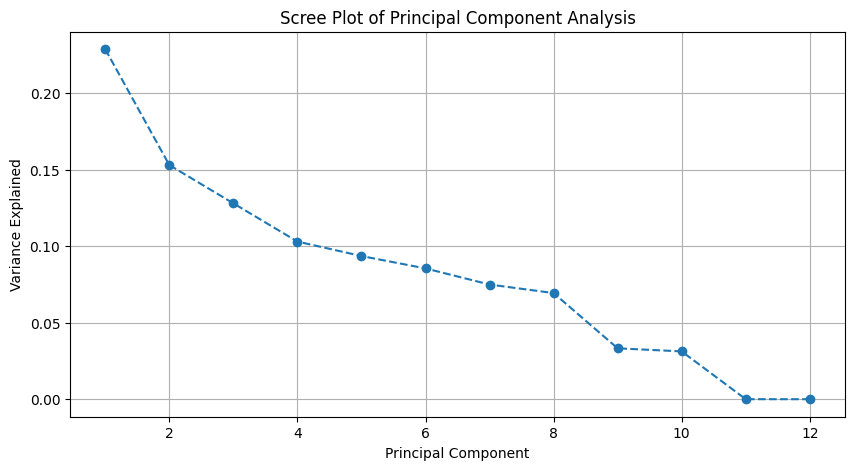

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot of Principal Component Analysis')
plt.grid(True)
plt.show()

In [14]:
import numpy as np
cov_matrix = np.cov(df_con.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [15]:
eigen_df = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Eigenvector1': eigenvectors[:, 0],
    'Eigenvector2': eigenvectors[:, 1]
})
print(eigen_df)

      Eigenvalue  Eigenvector1  Eigenvector2
0   2.747779e+00     -0.016038     -0.112280
1   1.838466e+00      0.009177     -0.096659
2   1.537835e+00      0.009339      0.083866
3   1.237777e+00     -0.032584      0.049493
4   1.124075e+00     -0.429401     -0.202014
5   1.026921e+00     -0.135382     -0.188523
6   8.335114e-01     -0.329612      0.607902
7   9.003466e-01      0.329252     -0.608392
8   3.996072e-01      0.003679     -0.051371
9   3.754605e-01     -0.506148     -0.274439
10  4.016466e-04     -0.542992     -0.230788
11  6.331275e-07     -0.166452     -0.145990


In [16]:
total_variance = sum(eigenvalues)
explained_variance_ratio = [(eig / total_variance) * 100 for eig in eigenvalues]

# Step 5: Create DataFrame for eigenvalues and variance explanation
eigen_df = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Explained Variance (%)': explained_variance_ratio
})
print(eigen_df)

      Eigenvalue  Explained Variance (%)
0   2.747779e+00               22.855915
1   1.838466e+00               15.292285
2   1.537835e+00               12.791643
3   1.237777e+00               10.295774
4   1.124075e+00                9.350013
5   1.026921e+00                8.541885
6   8.335114e-01                6.933113
7   9.003466e-01                7.489045
8   3.996072e-01                3.323916
9   3.754605e-01                3.123065
10  4.016466e-04                0.003341
11  6.331275e-07                0.000005


## Factor Analysis

In [17]:

num_factors =5  # You can adjust this number
fa = FactorAnalysis(n_components=num_factors, random_state=42)
fa.fit(df_con)

# Step 3: Extract Factor Loadings
factor_loadings = pd.DataFrame(fa.components_.T, index=df_con.columns, columns=[f'Factor{i+1}' for i in range(num_factors)])

In [18]:
factor_loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
Technical Score_JD,0.027546,0.030739,0.021033,0.754928,-0.386225
Programming Score_JD,-0.012943,0.043471,0.013640,0.805585,0.306869
Soft Score_with_JD,-0.037452,-0.007970,-0.037968,-0.144393,-0.394797
Education_match_Score_with_JD,0.009578,0.011744,-0.052548,0.010837,0.394761
Age,0.617878,0.240920,-0.014967,-0.003029,-0.052643
Years of Experience in Company,0.204140,0.097394,0.065897,0.016450,0.038985
KPI,0.193293,-0.004416,-0.981120,0.000038,-0.000013
Absentism Rate,-0.192605,0.004356,0.980865,0.000747,-0.001113
Employee Satisfaction Score,0.025343,0.029291,0.038116,0.005643,0.048007
Total Experience in Years,0.936769,0.346810,0.046749,0.000002,0.000003


In [23]:
def generate_pc_equations_dict(loadings_df):
    """
    Converts PCA loadings into a dictionary of formatted PC equations.

    Parameters:
    - loadings_df (pd.DataFrame): PCA loadings DataFrame with PCs as columns and features as rows.

    Returns:
    - dict: Dictionary where keys are 'PC1', 'PC2', etc., and values are properly formatted equations.
    """
    equations = {}

    for pc_name in loadings_df.columns:
        terms = []

        # Iterate through each feature's loading for the current PC
        for feature, loading in loadings_df[pc_name].items():
            if abs(loading) > 1e-4:  # Filter out near-zero coefficients
                terms.append(f"({loading:.4f}) * df_pc['{feature}']")  # Format feature name

        # Store properly formatted equation as a dictionary entry
        equations[pc_name] = " + ".join(terms)

    return equations

# Use the selected loadings DataFrame
pc_equations_dict = generate_pc_equations_dict(factor_loadings)

# Print dictionary output
print(pc_equations_dict)


{'Factor1': "(0.0275) * df_pc['Technical Score_JD'] + (-0.0129) * df_pc['Programming Score_JD'] + (-0.0375) * df_pc['Soft Score_with_JD'] + (0.0096) * df_pc['Education_match_Score_with_JD'] + (0.6179) * df_pc['Age'] + (0.2041) * df_pc['Years of Experience in Company'] + (0.1933) * df_pc['KPI'] + (-0.1926) * df_pc['Absentism Rate'] + (0.0253) * df_pc['Employee Satisfaction Score'] + (0.9368) * df_pc['Total Experience in Years'] + (0.9877) * df_pc['Employee Score Based on Goals'] + (0.3719) * df_pc['Goal Complete Ratio']", 'Factor2': "(0.0307) * df_pc['Technical Score_JD'] + (0.0435) * df_pc['Programming Score_JD'] + (-0.0080) * df_pc['Soft Score_with_JD'] + (0.0117) * df_pc['Education_match_Score_with_JD'] + (0.2409) * df_pc['Age'] + (0.0974) * df_pc['Years of Experience in Company'] + (-0.0044) * df_pc['KPI'] + (0.0044) * df_pc['Absentism Rate'] + (0.0293) * df_pc['Employee Satisfaction Score'] + (0.3468) * df_pc['Total Experience in Years'] + (-0.1523) * df_pc['Employee Score Based on

In [25]:
def construct_final_equation(pc_equations, explained_variance):
    """
    Constructs the final equation using weighted principal components.

    Parameters:
    - pc_equations (dict): Dictionary of PC equations in the format {'PC1': 'PC1 = ...'}
    - explained_variance (list): List of variance explained by each PC.

    Returns:
    - str: Final equation combining all principal components with weights.
    """
    final_terms = []

    for i, variance in enumerate(explained_variance):
        pc_name = f'FAL{i+1}'
        weight = f"({variance:.4f})"  # Format weight to 4 decimals
        final_terms.append(f"{weight} * {pc_name}")

    # Construct final equation
    final_equation = " + ".join(final_terms)

    return final_equation

# Example Variance Explained by Each PC (Replace with actual values)
selected_eigenvalues = eigenvalues[:5] 
var=[] 
for val in selected_eigenvalues:
    x=val/sum(selected_eigenvalues)
    var.append(x)

# Example PC Equations (Already computed from previous step)
pc_equations = pc_equations_dict

# Construct final equation
final_equation = construct_final_equation(pc_equations, var)

print("Final Equation:")
print(final_equation)

Final Equation:
(0.3238) * FAL1 + (0.2166) * FAL2 + (0.1812) * FAL3 + (0.1459) * FAL4 + (0.1325) * FAL5


In [26]:
employee_ids = df_n['EmployeeCode']
df_last = pd.concat([employee_ids.reset_index(drop=True), df_con], axis=1)

In [27]:
def compute_employee_scores(df, pc_equations, explained_variance):
    """
    Computes an overall Score for each employee using principal component equations and explained variance.
    
    Parameters:
    - df (pd.DataFrame): Employee dataset.
    - pc_equations (dict): Dictionary where keys are 'PC1', 'PC2', etc., and values are PC equations.
    - explained_variance (list): List of variance explained by each PC.
    
    Returns:
    - pd.DataFrame: Updated DataFrame with computed 'Score' column.
    """
    # Ensure column names match exactly
    available_columns = set(df.columns)
    
    # Fix column mismatches dynamically
    for pc in pc_equations:
        for col in df.columns:
            pc_equations[pc] = pc_equations[pc].replace(f"df['{col}']", f"df['{col.strip()}']")

    # Compute Principal Component Scores
    pc_scores={pc: eval(pc_equations[pc]) for pc in pc_equations}

    # Convert PC scores into DataFrame
    pc_scores_df= pd.DataFrame(pc_scores, index=df.index)

    # Ensure number of PCs and variance values match
    num_computed_pcs = len(pc_scores_df.columns)
    explained_variance = explained_variance[:num_computed_pcs]  # Trim if needed

    # Compute final Score using weighted sum
    df["Score"] = sum(explained_variance[i] * pc_scores_df.iloc[:, i] for i in range(num_computed_pcs))

    return df

# Example Usage
df_add=df_last # Load employee dataset

# Example Principal Component Equations (Dynamically replace with actual values)
pc_equations = pc_equations_dict
# Example Variance Explained (Replace with actual values)
explained_variance =var

# Compute Scores
df_k =compute_employee_scores(df_last, pc_equations, explained_variance)

# Save the updated DataFrame

# Display first few rows with computed Score
df_k.head()

NameError: name 'df_pc' is not defined